**stock-market**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [36]:
df = pd.read_csv("C:\College\Siddhivinayak\internship\data sets\stocks.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\S.vinayak Hadapad\AppData\Local\Temp\ipykernel_9816\3694381705.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("C:\College\Siddhivinayak\internship\data sets\stocks.csv")


In [37]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [38]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [39]:
df.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [40]:
df.size

1984

In [41]:
df.shape

(248, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

In [44]:
df['Daily_Return'] = df['Close'].pct_change()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Volatility'] = df['Daily_Return'].rolling(window=5).std()

In [45]:
df.dropna(inplace=True)

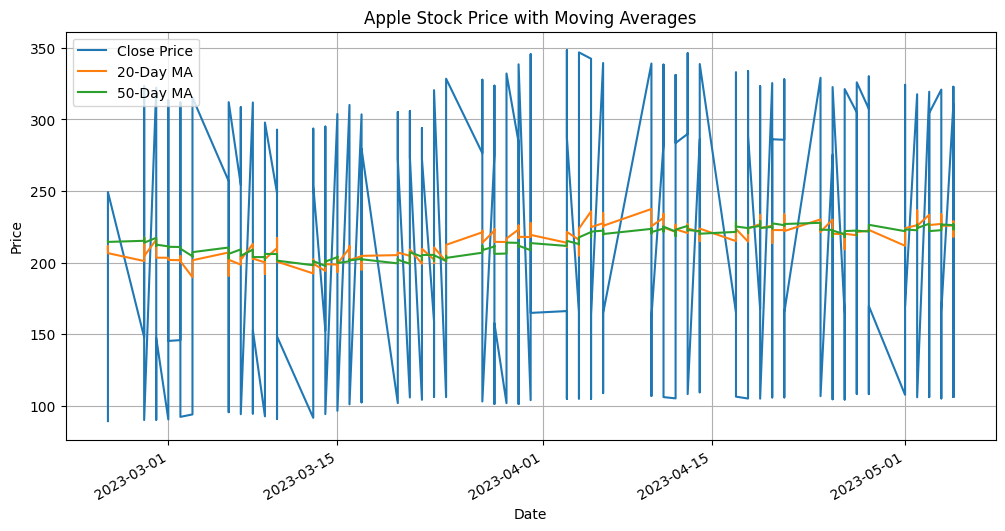

In [46]:
plt.figure(figsize=(12,6))
df['Close'].plot(label='Close Price')
df['MA_20'].plot(label='20-Day MA')
df['MA_50'].plot(label='50-Day MA')
plt.title("Apple Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\S.vinayak Hadapad\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


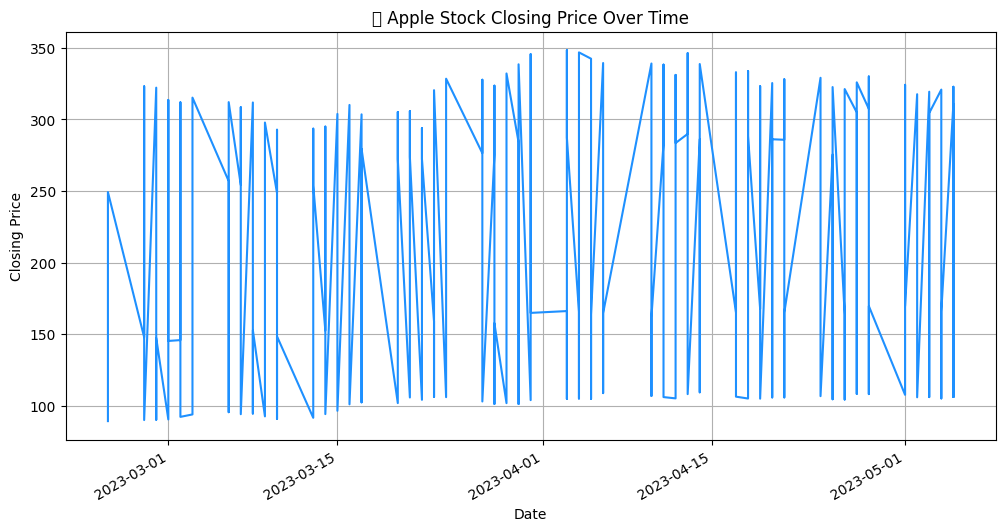

In [47]:
plt.figure(figsize=(12,6))
df['Close'].plot(color='dodgerblue')
plt.title("📈 Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

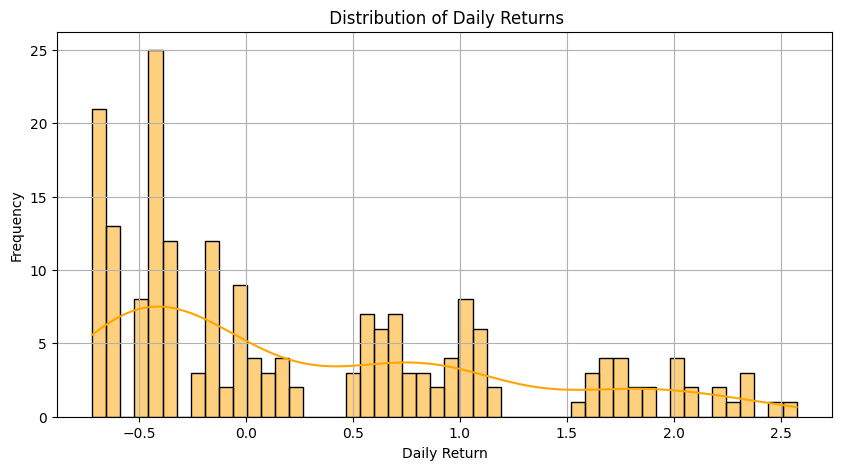

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='orange')
plt.title(" Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

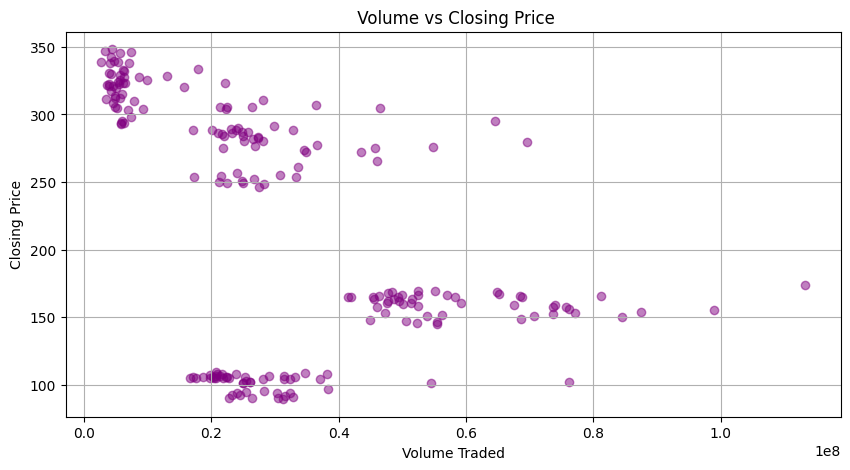

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='purple')
plt.title(" Volume vs Closing Price")
plt.xlabel("Volume Traded")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

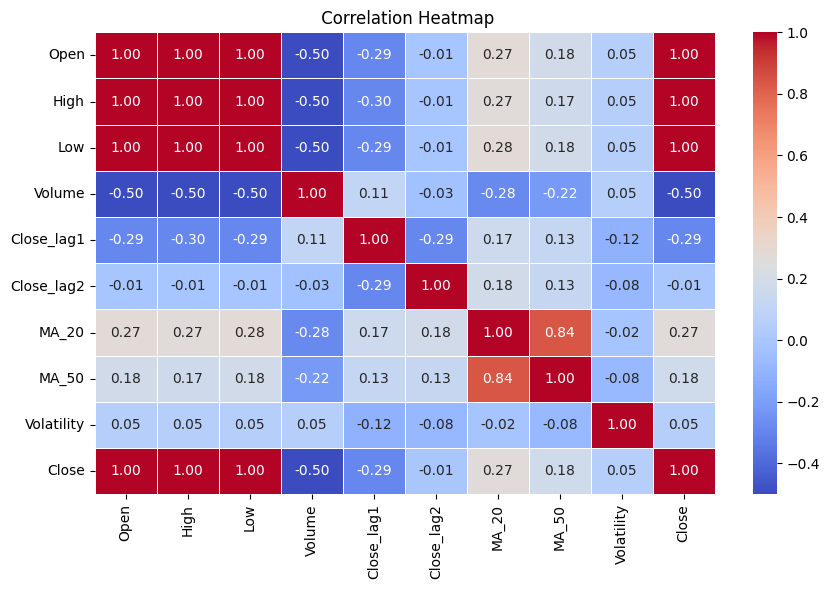

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(" Correlation Heatmap")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manually take square root
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation:
RMSE: 4.14
MAE: 2.77
R² Score: 1.00


In [52]:
latest_data = df.iloc[-1:]
next_input = latest_data[features]
next_prediction = model.predict(next_input)[0]

print(f"\n Predicted Next Day Close Price: ${next_prediction:.2f}")


 Predicted Next Day Close Price: $105.68
